In [1]:
from keras.datasets import cifar100
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

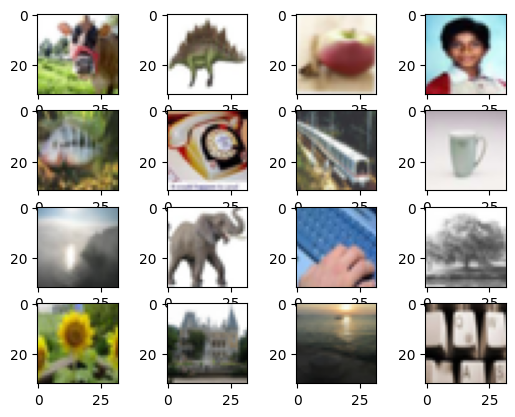

In [3]:
# cofirm train data
def show_imgs(X):
  plt.figure(1)

  k = 0

  for i in range(0, 4):
    for j in range(0, 4):
      plt.subplot2grid((4, 4), (i, j))
      plt.imshow((X[k]))

      k = k + 1

  # show the plot
  plt.show()

show_imgs(x_train[:16])

In [4]:
# modeling
model = Sequential()
model.add(Conv2D(32, (2, 2), padding = 'same', input_shape = (32, 32, 3), activation = 'elu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (2, 2), padding = 'same', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'softmax'))

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.001, decay = 0.00005), metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

In [7]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 1, mode = 'min', verbose = 1)]

In [8]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1, callbacks = callbacks)

Epoch 1/10
1250/1250 [==============================] - 17s 9ms/step - loss: 4.5466 - accuracy: 0.0236 - val_loss: 4.3224 - val_accuracy: 0.0436
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 4.4048 - accuracy: 0.0325 - val_loss: 4.2909 - val_accuracy: 0.0509
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 4.3404 - accuracy: 0.0435 - val_loss: 4.1342 - val_accuracy: 0.0690
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.3060 - accuracy: 0.0486 - val_loss: 4.0913 - val_accuracy: 0.0872
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 4.2560 - accuracy: 0.0582 - val_loss: 4.0575 - val_accuracy: 0.0964
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 4.1717 - accuracy: 0.0686 - val_loss: 3.8748 - val_accuracy: 0.1193
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 4.0606 - accuracy: 0.0856 - val_loss: 3.7788 - val_accuracy

In [9]:
res_acc = model.evaluate(x_test, y_test)

print('res_acc', res_acc[1])
print('res_score', res_acc[0])

313/313 [==============================] - 1s 3ms/step - loss: 3.6599 - accuracy: 0.1588
res_acc 0.15880000591278076
res_score 3.6599230766296387
